#various CNN networks on MNIST dataset

# Dataset(preprocessing)

In [0]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 14s 1us/step


In [0]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
# this function is used draw Categorical Crossentropy Loss VS No. of epochs plot
def plt_dynamic(x, vy, ty):
  plt.figure(figsize=(10,5))
  plt.plot(x, vy, 'b', label="Validation Loss")
  plt.plot(x, ty, 'r', label="Train Loss")
  plt.xlabel('Epochs') 
  plt.ylabel('Categorical Crossentropy Loss')
  plt.title('\nCategorical Crossentropy Loss VS Epochs')
  plt.legend()
  plt.grid()
  plt.show()

# Model 1(3 CNN layer with krnal size 3*3)

In [0]:
from keras.initializers import he_normal
from keras.layers.normalization import BatchNormalization
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
model1 = Sequential()

#first layer
model1.add(Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=input_shape))

#second layer
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

# Adding third conv layer
model1.add(Conv2D(128, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

#flattening
model1.add(Flatten())

# Adding first hidden layer
model1.add(Dense(256, activation='relu',kernel_initializer=he_normal(seed=None)))
model1.add(Dropout(0.5))

#output layer
model1.add(Dense(num_classes, activation='softmax'))

#compiling the model
model1.compile(loss=keras.losses.categorical_crossentropy,  optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])


# Fitting the data to the model
history1 = model1.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1,  validation_data=(x_test, y_test))


W0625 03:32:07.078349 22112 deprecation_wrapper.py:119] From C:\Users\IDM LAB-09\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0625 03:32:07.431370 22112 deprecation_wrapper.py:119] From C:\Users\IDM LAB-09\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0625 03:32:07.452371 22112 deprecation_wrapper.py:119] From C:\Users\IDM LAB-09\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0625 03:32:07.577378 22112 deprecation_wrapper.py:119] From C:\Users\IDM LAB-09\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0625 03:32:07.598379 22112 deprecation_wrapper.py:119] Fro

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 118s 2ms/step - loss: 0.2425 - acc: 0.9236 - val_loss: 0.0445 - val_acc: 0.9857
Epoch 2/12
60000/60000 [==============================] - 127s 2ms/step - loss: 0.0698 - acc: 0.9787 - val_loss: 0.0307 - val_acc: 0.9896
Epoch 3/12
60000/60000 [==============================] - 121s 2ms/step - loss: 0.0516 - acc: 0.9846 - val_loss: 0.0260 - val_acc: 0.9910
Epoch 4/12
60000/60000 [==============================] - 121s 2ms/step - loss: 0.0422 - acc: 0.9870 - val_loss: 0.0265 - val_acc: 0.9917
Epoch 5/12
60000/60000 [==============================] - 111s 2ms/step - loss: 0.0359 - acc: 0.9893 - val_loss: 0.0201 - val_acc: 0.9933
Epoch 6/12
60000/60000 [==============================] - 107s 2ms/step - loss: 0.0324 - acc: 0.9897 - val_loss: 0.0204 - val_acc: 0.9937
Epoch 7/12
60000/60000 [==============================] - 121s 2ms/step - loss: 0.0284 - acc: 0.9910 - val_loss: 0.0195 - 

Test score: 0.014527662280662117
Test accuracy: 0.9945


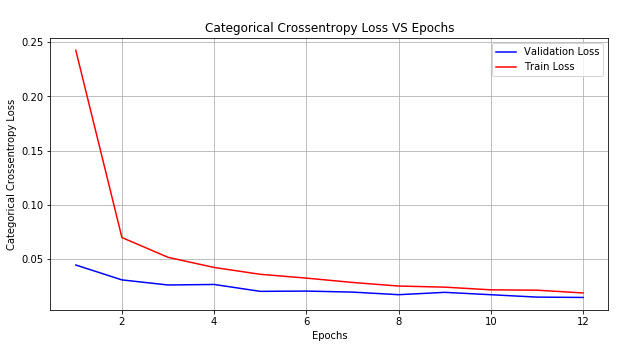

In [0]:
# Evaluating the model
score = model1.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

# Test and train accuracy of the model
model1_test = score[1]
model1_train = max(history1.history['acc'])

# Plotting Train and Test Loss VS no. of epochs
# list of epoch numbers
x = list(range(1,epochs+1))

# Validation loss
vy = history1.history['val_loss']
# Training loss
ty = history1.history['loss']

# Calling the function to draw the plot
plt_dynamic(x, vy, ty)

# Model 2(5 CNN layer with kernal size 5*5)

In [0]:
from keras.initializers import he_normal
from keras.layers.normalization import BatchNormalization
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
model2 = Sequential()

#first layer
model2.add(Conv2D(32, kernel_size=(5, 5),padding='same', activation='relu',input_shape=input_shape))

#second layer
model2.add(Conv2D(64, (5, 5), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model2.add(Dropout(0.25))

# third conv layer
model2.add(Conv2D(128, (5, 5), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

# fourth conv layer
model2.add(Conv2D(256, (5, 5), padding='same',activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model2.add(Dropout(0.25))

# fifth conv layer
model2.add(Conv2D(512, (5, 5),padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model2.add(Dropout(0.25))

#flattening
model2.add(Flatten())

# Adding first hidden layer
model2.add(Dense(512, activation='relu',kernel_initializer=he_normal(seed=None)))
# Adding Batch Normalization
model2.add(BatchNormalization())
# Adding Dropout
model2.add(Dropout(0.5))


#output layer
model2.add(Dense(num_classes, activation='softmax'))

#compiling the model
model2.compile(loss=keras.losses.categorical_crossentropy,  optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])


# Fitting the data to the model
history2 = model2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1,  validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 1107s 18ms/step - loss: 2.4445 - acc: 0.1698 - val_loss: 4.9767 - val_acc: 0.1135
Epoch 2/12
60000/60000 [==============================] - 888s 15ms/step - loss: 1.8481 - acc: 0.2779 - val_loss: 1.6913 - val_acc: 0.3095
Epoch 3/12
60000/60000 [==============================] - 897s 15ms/step - loss: 1.5117 - acc: 0.3984 - val_loss: 1.7777 - val_acc: 0.3007
Epoch 4/12
60000/60000 [==============================] - 887s 15ms/step - loss: 1.2493 - acc: 0.5232 - val_loss: 1.2399 - val_acc: 0.5372
Epoch 5/12
60000/60000 [==============================] - 909s 15ms/step - loss: 1.0504 - acc: 0.6229 - val_loss: 0.7914 - val_acc: 0.7539
Epoch 6/12
60000/60000 [==============================] - 887s 15ms/step - loss: 0.8085 - acc: 0.7366 - val_loss: 0.5894 - val_acc: 0.8193
Epoch 7/12
60000/60000 [==============================] - 888s 15ms/step - loss: 0.6266 - acc: 0.8020 - val_loss: 0

Test score: 0.24009098520278932
Test accuracy: 0.9305


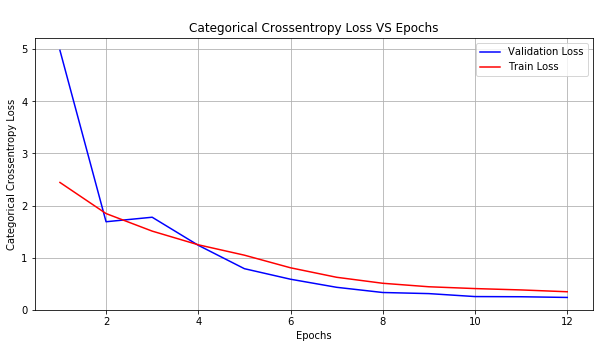

In [0]:
# Evaluating the model
score = model2.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

# Test and train accuracy of the model
model2_test = score[1]
model2_train = max(history2.history['acc'])

# Plotting Train and Test Loss VS no. of epochs
# list of epoch numbers
x = list(range(1,epochs+1))

# Validation loss
vy = history2.history['val_loss']
# Training loss
ty = history2.history['loss']

# Calling the function to draw the plot
plt_dynamic(x, vy, ty)

#Model 3(7 CNN layer with kernal size 2*2)

In [0]:
from keras.initializers import he_normal
from keras.layers.normalization import BatchNormalization
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# Initialising the model
model3 = Sequential()

# Adding first conv layer
model3.add(Conv2D(32, kernel_size=(2, 2),padding='same',activation='relu',input_shape=input_shape))

# Adding second conv layer
model3.add(Conv2D(32, (2, 2), activation='relu'))
model3.add(MaxPooling2D(pool_size=(3, 3), strides=(1,1)))
model3.add(Dropout(0.3))

# Adding third conv layer
model3.add(Conv2D(64, (2, 2), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

# Adding fourth conv layer
model3.add(Conv2D(64, (2, 2),padding='same',activation='relu'))

# Adding fifth conv layer
model3.add(Conv2D(128, (2, 2), activation='relu'))
model3.add(MaxPooling2D(pool_size=(3, 3),padding='same'))
model3.add(Dropout(0.25))

# Adding sixth conv layer
model3.add(Conv2D(128, (2, 2),padding='same',activation='relu'))

# Adding seventh conv layer
model3.add(Conv2D(256, (2, 2), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))
model3.add(Dropout(0.25))

# Adding flatten layer
model3.add(Flatten())

# Adding first hidden layer
model3.add(Dense(256, activation='relu',kernel_initializer=he_normal(seed=None)))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))

# Adding second hidden layer
model3.add(Dense(128, activation='relu',kernel_initializer=he_normal(seed=None)))
model3.add(Dropout(0.25))

# Adding output layer
model3.add(Dense(num_classes, activation='softmax'))

# Printing model Summary
print(model3.summary())

# Compiling the model
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting the data to the model
history_7 = model3.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 28, 28, 32)        160       
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 27, 27, 32)        4128      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 25, 25, 32)        0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 24, 24, 64)        8256      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 12, 12, 64)        16448     
__________

Test score: 0.021899777859748427
Test accuracy: 0.9935


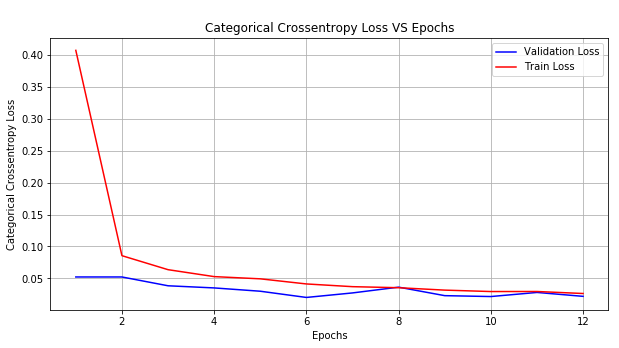

In [0]:
# Evaluating the model
score = model3.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

# Test and train accuracy of the model
model3_test = score[1]
model3_train = max(history_7.history['acc'])

# Plotting Train and Test Loss VS no. of epochs
# list of epoch numbers
x = list(range(1,epochs+1))

# Validation loss
vy = history_7.history['val_loss']
# Training loss
ty = history_7.history['loss']

# Calling the function to draw the plot
plt_dynamic(x, vy, ty)

#conclusion

In [0]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Model","Train accuracy", "Test accuracy"]
x.add_row(["Model 1(3 CNN layer with krnal size 3*3)", model1_train,model1_test])
x.add_row(["Model 2(5 CNN layer with kernal size 5*5)", model2_train,model2_test])
x.add_row(["Model 3(7 CNN layer with kernal size 2*2)", model3_train,model3_test])
print(x)

+-------------------------------------------+--------------------+---------------+
|                   Model                   |   Train accuracy   | Test accuracy |
+-------------------------------------------+--------------------+---------------+
|  Model 1(3 CNN layer with krnal size 3*3) | 0.9941166666666666 |     0.9945    |
| Model 2(5 CNN layer with kernal size 5*5) | 0.8912166666348775 |     0.9305    |
| Model 3(7 CNN layer with kernal size 2*2) | 0.9924666666666667 |     0.9935    |
+-------------------------------------------+--------------------+---------------+


Observation:

model 1 and model 3 is neither overfitting nor underfitting with test accuracy of 0.9945, 0.9935 respectively.

model 2 have train accuracy less than test so need to br recheck.